## Lab Assignment 2: Exploring Census Bureau data in Python

**Objectives:**
   * We will explore Census Bureau data using <code>cenpy</code>.
   * Learn about Census Bureau data variables and geographic units
   * Compute unemployment rate in Lane County, Oregon using just a few lines of code
   * Calculate some statistics using the <code>pandas</code> library
   * Export our data as a shapefile using <code>geopandas</code> 
   * Visualize our data in QGIS

We will be relying heavily on <code>cenpy</code> which is a package that enables automatic discovery and download of US Census Bureau data. <code>cenpy</code> formats Census data as a <code>geopandas</code> DataFrame for analysis in Python or export to GIS software such as QGIS. More information about this package can be found [here](https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?flush_cache=true), [here](https://nbviewer.org/github/cenpy-devs/cenpy/blob/master/notebooks/segregation.ipynb), and the [GitHub repo](https://github.com/cenpy-devs/cenpy).

### Before we start...

Before we start this assignment, we need to check whether there are any updates to the original course repository. 

We can do this by adding the original repository (the one we forked) as a *remote*:

<code>git remote add upstream https://github.com/JohnnyRyan1/geospatial-data-science</code>

<code>git fetch upstream</code>

<code>git merge upstream/master master</code>


In [2]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cenpy'

As a first example, let's suppose we're interested in unemployment at the tract level in Lane County, Oregon. To download data, we first need to identify the relevant product and variables of interest to us. We will use data from the American Community Survey (ACS) product which provides social and economic information every year but, unlike the Decenniel Survey, only represents a sample (about 3.5 million) of US households. 

In [1]:
# Define product
acs = products.ACS(2019)

NameError: name 'products' is not defined

Now we need a list of Census variables. One way to do this is to browse the ACS documentation which can be found here: https://api.census.gov/data/2019/acs/acs5/variables.html. The other is to search the tables using keywords and <code>cenpy</code>.

In [6]:
# Print list of tables
acs.filter_tables('EMPLOYMENT', by='description')

,description,columns
table_name,,
B10058,EMPLOYMENT STATUS OF GRANDPARENTS LIVING WITH ...,"[B10058_001E, B10058_002E, B10058_003E, B10058..."
B14005,SEX BY SCHOOL ENROLLMENT BY EDUCATIONAL ATTAIN...,"[B14005_001E, B14005_002E, B14005_003E, B14005..."
B16010,EDUCATIONAL ATTAINMENT AND EMPLOYMENT STATUS B...,"[B16010_001E, B16010_002E, B16010_003E, B16010..."
B17005,POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVI...,"[B17005_001E, B17005_002E, B17005_003E, B17005..."
B19053,SELF-EMPLOYMENT INCOME IN THE PAST 12 MONTHS F...,"[B19053_001E, B19053_002E, B19053_003E]"
B19063,AGGREGATE SELF-EMPLOYMENT INCOME IN THE PAST 1...,[B19063_001E]
B21005,AGE BY VETERAN STATUS BY EMPLOYMENT STATUS FOR...,"[B21005_001E, B21005_002E, B21005_003E, B21005..."
B23001,SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULA...,"[B23001_001E, B23001_002E, B23001_003E, B23001..."
B23003,PRESENCE OF OWN CHILDREN UNDER 18 YEARS BY AGE...,"[B23003_001E, B23003_002E, B23003_003E, B23003..."


In our case we are interested in the variable **B23025** which contains employment status for the population that is 16 years and over. 

In [8]:
# Print list of variables
acs.filter_variables('B23025')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required,values
B23025_004E,Estimate!!Total!!In labor force!!Civilian labo...,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_004EA,B23025_004M,B23025_004MA",NaN,NaN
B23025_005E,Estimate!!Total!!In labor force!!Civilian labo...,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_005EA,B23025_005M,B23025_005MA",NaN,NaN
B23025_003E,Estimate!!Total!!In labor force!!Civilian labo...,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_003EA,B23025_003M,B23025_003MA",NaN,NaN
B23025_002E,Estimate!!Total!!In labor force,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_002EA,B23025_002M,B23025_002MA",NaN,NaN
B23025_001E,Estimate!!Total,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_001EA,B23025_001M,B23025_001MA",NaN,NaN
B23025_007E,Estimate!!Total!!Not in labor force,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_007EA,B23025_007M,B23025_007MA",NaN,NaN
B23025_006E,Estimate!!Total!!In labor force!!Armed Forces,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_006EA,B23025_006M,B23025_006MA",NaN,NaN


After identifying relevant variables, we can download the data and compute variables at the tract level which is the third smallest geographic unit in Census data. 

<div>
<img src="images/census_geographic_units.png" width="800"/>
</div>

In [10]:
# Download data
lane = products.ACS(2019).from_county('Lane County, OR', level='tract',
                                        variables=['B23025_003E', 'B23025_005E'])

# Compute unemployment percentage
lane['percent_unemployed'] = lane['B23025_005E'] / lane['B23025_003E'] * 100

/home/johnny/anaconda3/envs/lab1/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/johnny/anaconda3/envs/lab1/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/johnny/anaconda3/envs/lab1/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use 

Now let’s look at some summary statistics.

In [14]:
# Caluclate some stats
lane['percent_unemployed'].describe()

count    86.000000
mean      6.914352
std       3.492321
min       1.193565
25%       4.665387
50%       6.242081
75%       8.644192
max      24.157303
Name: percent_unemployed, dtype: float64

We can also plot this easily.

<AxesSubplot:>

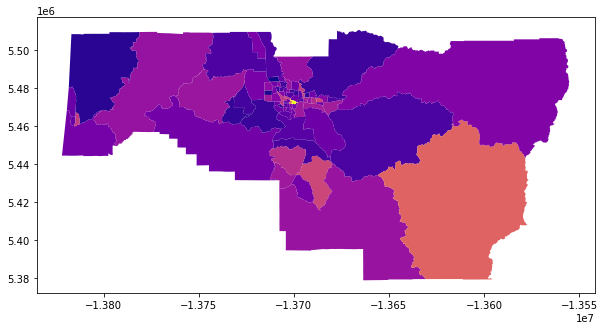

In [15]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
lane.plot('percent_unemployed', ax=ax, cmap='plasma')

But it is sometimes useful to export the data for viewing in GIS software.

In [ ]:
# Save to file
lane.to_file('/path/to/lane_unemployment.shp') # Note that you will have to change the path to your student folder

### Visualizing data in QGIS

Open QGIS and install the **QuickMapServices** plugin which provides some basemaps for locating our data. 

* **Plugins** --> **Manage and Install Plugins**
* Search for **QuickMapServices** and **Install Plugin**

When the plugin is installed, we will display the OpenStreetMap (OSM) basemap in our QGIS workspace. OSM is a free editable geographic database of the world. 

* **Web** --> **QuickMapServices** --> **OSM** --> **OSM Standard**

Add *lane_unemployment.shp* to your QGIS workspace and change the Symbology of the layer so that the unemployment data is represented by a colorscale.


### Question 1 (10 points): 
Copy and paste your map to your answer document. Which tract has the highest unemployment percentage in Lane County? How many people are unemployed in this tract? 

### Question 2 (40 points): 
Produce your own chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Copy and paste your map to your answer document with a short description of what your map shows. *Note*: *if your map represents a state, use county level Census data, if your map represents a county or city, use tract or block group level data*. 